In [1]:
# Author and date
import datetime, getpass
user = getpass.getuser()
print(user, datetime.datetime.today())

ubuntu 2020-04-26 21:34:19.761292


In [2]:
user = 'cinni'  # the system user was different from database user

In [3]:
%matplotlib inline

In [4]:
import datajoint as dj
schema = dj.schema(f'{user}_university')
schema.spawn_missing_classes()

Connecting cinni@db.data-science-ust.net:3306


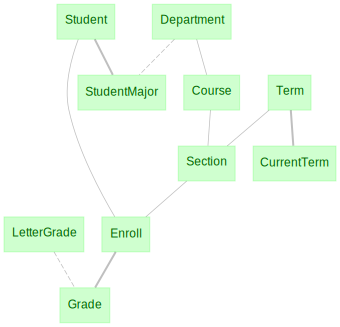

In [5]:
dj.Diagram(schema)

# Generate fake data

In [6]:
# Cleanup from previous run
Department.delete()
Student.delete()
LetterGrade.delete()
Term.delete()

About to delete:
`cinni_university`.`enroll`: 30525 items
`cinni_university`.`section`: 2558 items
`cinni_university`.`course`: 45 items
`cinni_university`.`student_major`: 1130 items
`cinni_university`.`department`: 4 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`cinni_university`.`student`: 1500 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`cinni_university`.`letter_grade`: 11 items
Proceed? [yes, No]: yes
Committed.
About to delete:
`cinni_university`.`current_term`: 1 items
`cinni_university`.`term`: 60 items
Proceed? [yes, No]: yes
Committed.


In [7]:
Term.delete()

About to delete:
Nothing to delete


In [8]:
from tqdm import tqdm
import faker
import random
import itertools
import datetime
fake = faker.Faker()

In [9]:
fake.name_female()

'Heather Byrd'

## Students

In [10]:
def yield_students():
    fake_name = {'F': fake.name_female, 'M': fake.name_male}
    while True:  # ignore invalid values
        try:
            sex = random.choice(('F', 'M'))
            first_name, last_name = fake_name[sex]().split(' ')[:2]
            street_address, city = fake.address().split('\n')
            city, state = city.split(', ')
            state, zipcode = state.split(' ')            
        except ValueError:
            continue
        else:
            yield dict(
                first_name=first_name,
                last_name=last_name,
                sex=sex,
                home_address=street_address,
                home_city=city,
                home_state=state,
                home_zip=zipcode,
                date_of_birth=str(
                    fake.date_time_between(start_date="-35y", end_date="-15y").date()),
                home_phone = fake.phone_number()[:20])

In [11]:
Student.insert(dict(k, student_id=i) for i, k in zip(range(1000,2500), yield_students()))

In [12]:
Student()

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,James,Rivera,M,2005-03-06,774 Obrien Circles,North Jeffreytown,TX,06693,001-777-065-9901x087
1001,Theresa,Wall,F,2001-02-26,740 Nelson Haven,Whiteton,ND,99457,(587)747-7084x11856
1002,Mr.,Alan,M,2000-07-03,85126 Wendy Rue,Gregorytown,DE,90839,+1-570-449-9303x445
1003,Luke,Kane,M,1993-08-20,375 Kevin Park Suite 730,Sandersmouth,ND,34203,+1-335-887-4323
1004,Jessica,Young,F,1998-06-15,160 Cox Alley,East Colleenberg,NY,90511,(901)133-6705
1005,Mark,Bowman,M,1987-05-04,988 Li Field Suite 252,Lake Amber,NE,16886,001-731-714-4405x157
1006,Heidi,Morris,F,2004-12-03,91685 Luis Springs,Annefurt,IN,02737,938.726.9775x389
1007,Christopher,Mcmillan,M,1990-10-14,0626 Jonathan Locks Suite 677,New Douglasfort,GA,21494,+1-970-219-6340x8975
1008,Laura,Hines,F,1997-08-18,242 Lopez Trace Suite 501,New Judithbury,WV,03977,074-051-1830x531
1009,Sarah,Pennington,F,1989-07-23,3728 Wright Row,Allentown,TX,26926,(497)449-0347


## Departments, majors, and courses

In [13]:
Department.insert(
    dict(dept=dept, 
         dept_name=name, 
         dept_address=fake.address(), 
         dept_phone=fake.phone_number()[:20])
    for dept, name in [
        ["CS", "Computer Science"],
        ["BIOL", "Life Sciences"],
        ["PHYS", "Physics"],
        ["MATH", "Mathematics"]])

In [14]:
StudentMajor.insert({**s, **d, 
                     'declare_date':fake.date_between(start_date=datetime.date(1999,1,1))}
    for s, d in zip(Student.fetch('KEY'), random.choices(Department.fetch('KEY'), k=len(Student())))
                   if random.random() < 0.75)

In [15]:
 StudentMajor()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL",declare_date when student declared her major
1000,BIOL,2008-06-02
1001,MATH,2016-06-10
1002,CS,2009-10-21
1003,PHYS,2001-03-20
1004,PHYS,2003-09-25
1005,PHYS,2013-06-01
1007,PHYS,2010-07-28
1008,BIOL,2009-05-28
1009,CS,2009-01-25
1010,CS,2001-08-21


In [16]:
# from https://www.utah.edu/
Course.insert([
    ['BIOL', 1006, 'World of Dinosaurs', 3],
    ['BIOL', 1010, 'Biology in the 21st Century', 3],
    ['BIOL', 1030, 'Human Biology', 3],
    ['BIOL', 1210, 'Principles of Biology', 4],
    ['BIOL', 2010, 'Evolution & Diversity of Life', 3],
    ['BIOL', 2020, 'Principles of Cell Biology',  3],
    ['BIOL', 2021, 'Principles of Cell Science',  4],
    ['BIOL', 2030, 'Principles of Genetics',  3],
    ['BIOL', 2210, 'Human Genetics',3],
    ['BIOL', 2325, 'Human Anatomy', 4],
    ['BIOL', 2330, 'Plants & Society', 3],
    ['BIOL', 2355, 'Field Botany', 2],
    ['BIOL', 2420, 'Human Physiology', 4],

    ['PHYS', 2040, 'Classcal Theoretical Physics II', 4],
    ['PHYS', 2060, 'Quantum Mechanics', 3],
    ['PHYS', 2100, 'General Relativity and Cosmology', 3],
    ['PHYS', 2140, 'Statistical Mechanics', 4],
    
    ['PHYS', 2210, 'Physics for Scientists and Engineers I', 4], 
    ['PHYS', 2220, 'Physics for Scientists and Engineers II', 4],
    ['PHYS', 3210, 'Physics for Scientists I (Honors)', 4],
    ['PHYS', 3220, 'Physics for Scientists II (Honors)', 4],
    
    ['MATH', 1250, 'Calculus for AP Students I', 4],
    ['MATH', 1260, 'Calculus for AP Students II', 4],
    ['MATH', 1210, 'Calculus I', 4],
    ['MATH', 1220, 'Calculus II', 4],
    ['MATH', 2210, 'Calculus III', 3],
 
    ['MATH', 2270, 'Linear Algebra', 4],
    ['MATH', 2280, 'Introduction to Differential Equations', 4],
    ['MATH', 3210, 'Foundations of Analysis I', 4],
    ['MATH', 3220, 'Foundations of Analysis II', 4],
    
    ['CS', 1030, 'Foundations of Computer Science', 3],
    ['CS', 1410, 'Introduction to Object-Oriented Programming', 4],
    ['CS', 2420, 'Introduction to Algorithms & Data Structures', 4],
    ['CS', 2100, 'Discrete Structures', 3],
    ['CS', 3500, 'Software Practice', 4],
    ['CS', 3505, 'Software Practice II', 3],
    ['CS', 3810, 'Computer Organization', 4],
    ['CS', 4400, 'Computer Systems', 4],
    ['CS', 4150, 'Algorithms', 3],
    ['CS', 3100, 'Models of Computation', 3],
    ['CS', 3200, 'Introduction to Scientific Computing', 3],
    ['CS', 4000, 'Senior Capstone Project - Design Phase', 3],
    ['CS', 4500, 'Senior Capstone Project', 3],
    ['CS', 4940, 'Undergraduate Research', 3],
    ['CS', 4970, 'Computer Science Bachelor''s Thesis', 3]])

## Terms and course sections

In [17]:
Course()

"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010","course_name e.g. ""Neurobiology of Sensation and Movement.""",credits number of credits earned by completing the course
BIOL,1006,World of Dinosaurs,3.0
BIOL,1010,Biology in the 21st Century,3.0
BIOL,1030,Human Biology,3.0
BIOL,1210,Principles of Biology,4.0
BIOL,2010,Evolution & Diversity of Life,3.0
BIOL,2020,Principles of Cell Biology,3.0
BIOL,2021,Principles of Cell Science,4.0
BIOL,2030,Principles of Genetics,3.0
BIOL,2210,Human Genetics,3.0
BIOL,2325,Human Anatomy,4.0


In [18]:
Term.insert(dict(term_year=year, term=term) 
            for year in range(1999, 2019) 
            for term in ['Spring', 'Summer', 'Fall'])

Term().fetch(order_by=('term_year DESC', 'term DESC'), as_dict=True, limit=1)[0]

CurrentTerm().insert1({
    **Term().fetch(order_by=('term_year DESC', 'term DESC'), as_dict=True, limit=1)[0]})

def make_section(prob):
    for c in (Course * Term).proj():
        for sec in 'abcd':
            if random.random() < prob:
                break
            yield {
                **c, 'section': sec, 
                'auditorium': random.choice('ABCDEF') + str(random.randint(1,100))}   

Section.insert(make_section(0.5))

In [19]:
Section()

"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,auditorium
BIOL,1006,1999,Spring,a,B24
BIOL,1006,1999,Fall,a,C39
BIOL,1006,1999,Fall,b,D67
BIOL,1006,1999,Fall,c,A87
BIOL,1006,2000,Spring,a,D1
BIOL,1006,2000,Summer,a,B29
BIOL,1006,2000,Summer,b,C99
BIOL,1006,2000,Fall,a,D52
BIOL,1006,2001,Spring,a,C19
BIOL,1006,2001,Summer,a,B95


In [20]:
LetterGrade.insert([
    ['A',  4.00],
    ['A-', 3.67],
    ['B+', 3.33],
    ['B',  3.00],
    ['B-', 2.67],
    ['C+', 2.33],
    ['C',  2.00],
    ['C-', 1.67],
    ['D+', 1.33],
    ['D',  1.00],
    ['F',  0.00]])

## Enrollment and grades

In [21]:
terms = Term().fetch('KEY')
quit_prob = 0.1
for student in tqdm(Student.fetch('KEY')):
    start_term = random.randrange(len(terms))
    for term in terms[start_term:]:
        if random.random() < quit_prob:
            break
        else:
            sections = ((Section & term) - (Course & (Enroll & student))).fetch('KEY')
            if sections:
                Enroll.insert({**student, **section} for section in 
                              random.sample(sections, random.randrange(min(5, len(sections)))))

100%|██████████| 1500/1500 [05:36<00:00,  4.45it/s]


In [22]:
Student() & 'sex="F"' & 'date_of_birth> "2000-01-01"'

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1001,Theresa,Wall,F,2001-02-26,740 Nelson Haven,Whiteton,ND,99457,(587)747-7084x11856
1006,Heidi,Morris,F,2004-12-03,91685 Luis Springs,Annefurt,IN,02737,938.726.9775x389
1011,Laura,Moss,F,2000-02-01,662 Miller Locks Apt. 221,Silvaton,WV,08529,987.426.4441x6384
1012,Courtney,Gutierrez,F,2003-01-03,8014 Joseph Run,Brittanyport,TX,78748,(642)419-5164
1016,Charlene,Ford,F,2001-04-04,457 Miller Loaf,Erictown,CO,19034,619-812-6307x27925
1021,Megan,Ruiz,F,2003-07-10,744 Gonzalez Plains,Port Natasha,MD,62959,260-005-7477x6067
1025,Judy,Walker,F,2002-04-17,0772 Kenneth Fords Suite 608,Norrisview,HI,18146,678.465.9149
1036,Angela,Stafford,F,2003-10-12,906 David Forest Suite 857,Tylerberg,VA,01467,437-197-2533x332
1045,Sandra,Miller,F,2004-09-10,43404 Kenneth Corners Apt. 145,New Andrew,SC,25322,(127)059-7098x4662
1052,Maria,Webb,F,2005-03-06,97502 Morales Forge Apt. 402,Lake Patrick,AL,13267,001-104-650-2351x786


In [23]:
Enroll()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section
1002,BIOL,1030,2008,Fall,a
1002,BIOL,2020,2008,Spring,b
1002,BIOL,2021,2008,Fall,c
1002,BIOL,2420,2009,Summer,b
1002,CS,3100,2009,Summer,a
1002,CS,3500,2009,Fall,a
1002,CS,3505,2009,Fall,a
1002,CS,4400,2009,Fall,b
1002,MATH,1210,2008,Summer,a
1002,MATH,1260,2008,Spring,a


In [24]:
from matplotlib import pyplot as plt

In [32]:
q = Student.aggr(Enroll, n='count(*)').fetch('n')
q.make_sql()

AttributeError: 'numpy.ndarray' object has no attribute 'make_sql'

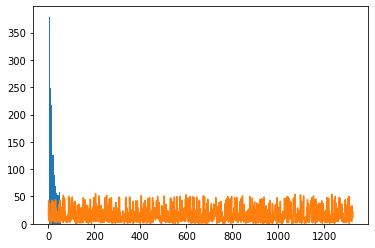

In [26]:
plt.hist(q)
plt.plot(q)
#plt.xlabel('# enrolled sections')
#plt.ylabel('# students')

In [27]:
# assign random grades
grades = LetterGrade.fetch('grade')

In [28]:
grade_keys = Enroll.fetch('KEY')
random.shuffle(grade_keys)
grade_keys = grade_keys[:len(grade_keys)*9//10]

In [29]:
Grade.insert({**key, 'grade':grade} 
             for key, grade in zip(grade_keys, random.choices(grades, k=len(grade_keys))))

In [30]:
Grade()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010",term_year,term,section,grade
1002,BIOL,2020,2008,Spring,b,A
1002,CS,4400,2009,Fall,b,A
1004,BIOL,2020,2004,Spring,a,A
1004,BIOL,2021,2004,Spring,b,A
1004,CS,2420,2006,Summer,d,A
1005,MATH,1260,2010,Summer,d,A
1005,MATH,3220,2011,Spring,d,A
1006,BIOL,2210,2011,Fall,a,A
1007,BIOL,1006,2016,Spring,a,A
1007,BIOL,2420,2012,Summer,b,A


In [31]:
# grade distribution 
dj.U('grade').aggr(Grade, n='count(*)')

grade,n calculated attribute
A,1749
A-,1802
B,1877
B+,1809
B-,1783
C,1804
C+,1859
C-,1785
D,1771
D+,1819
